In [1]:
import geopandas as gpd

# 1.绘图：

In [2]:
world = gpd.read_file('./datasets/naturalearth_lowres/naturalearth_lowres.shp')

In [3]:
world = world[world.name!="Antarctica"] # 去除南极洲

In [4]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [5]:
# 计算人均GPD数值
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [6]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.006176
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.001089
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001504
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046195
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.065298
...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.007412
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.008908
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.004417
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.017397


<AxesSubplot:>

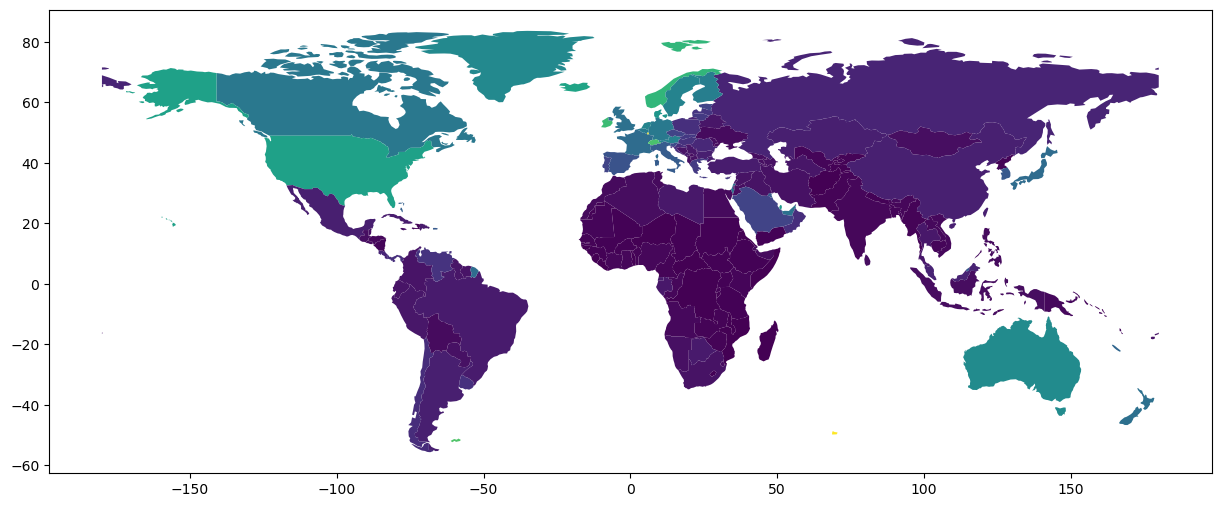

In [7]:
# column参数为需要使用其值分配颜色的列
world.plot(figsize=(15, 10) , column="gdp_per_cap")

## 2.创建图例：

### 绘制地图时，可以使用 legend 参数启用图例：

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:>

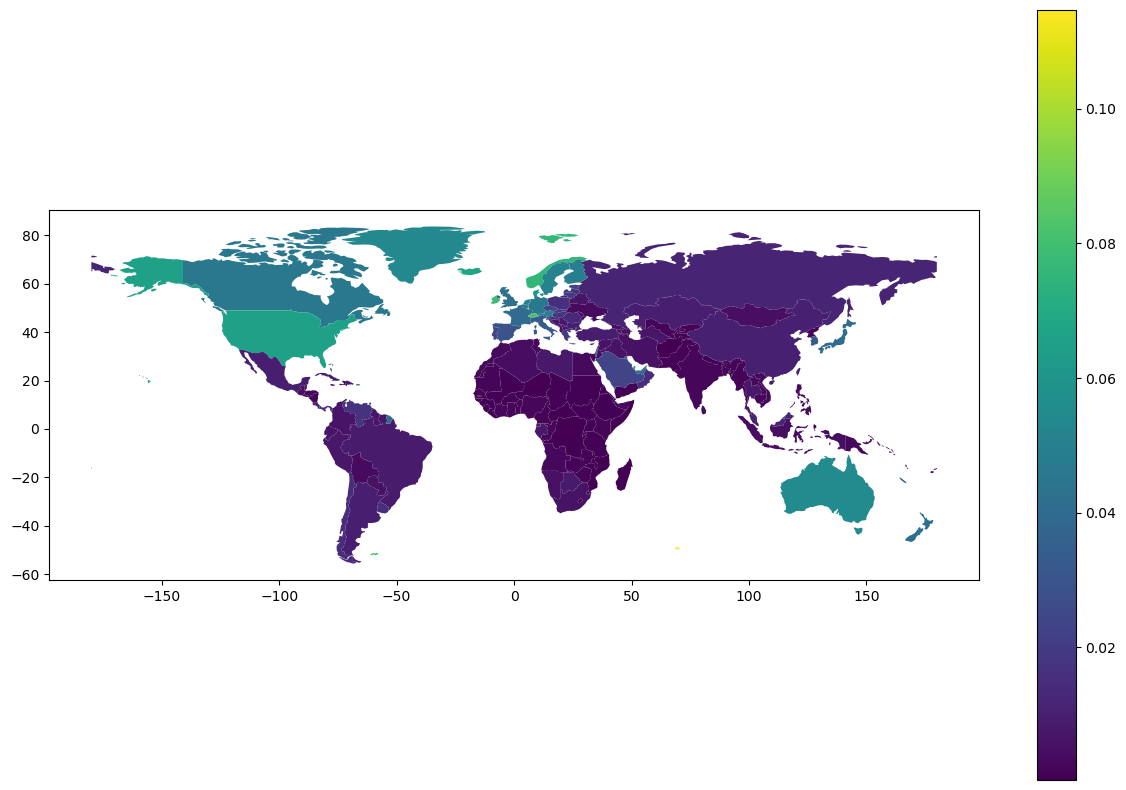

In [9]:
fig , ax = plt.subplots(1,1, figsize=(15, 10))

world.plot(column="gdp_per_cap" , ax=ax , legend=True)

### 但是，图例和绘图轴的默认外观可能并不理想。可以定义绘图轴（使用 ax）和图例轴（使用 cax），然后将它们传递给 plot() 调用。以下示例使用 mpl_toolkits 垂直对齐绘图轴和图例轴：

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<AxesSubplot:>

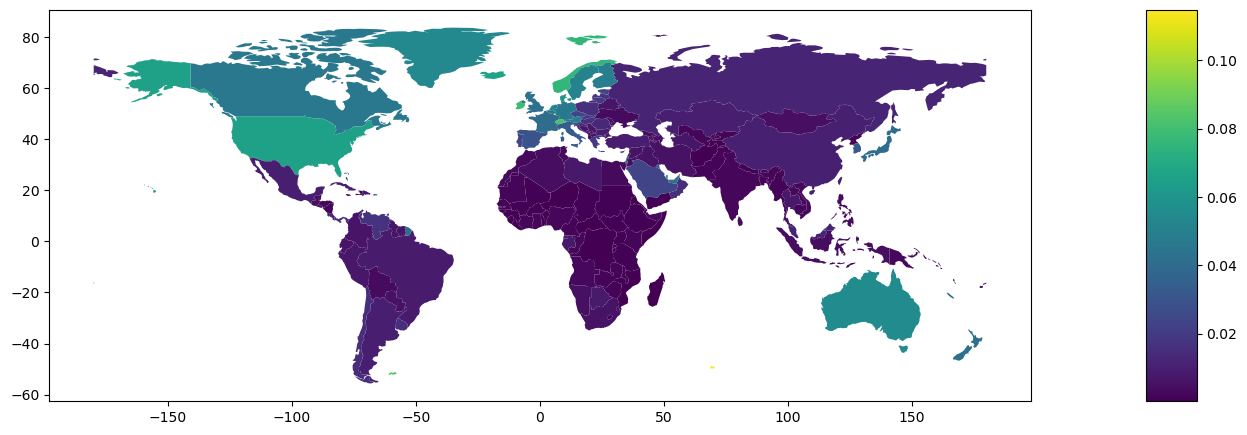

In [11]:
fig , ax = plt.subplots(1,1, figsize=(15, 10))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right" , size="5%" , pad=1)

world.plot(ax=ax , column="gdp_per_cap" , legend=True , cax=cax)

### 以下示例在地图下方绘制颜色条并使用 legend_kwds 添加其标签：

<AxesSubplot:>

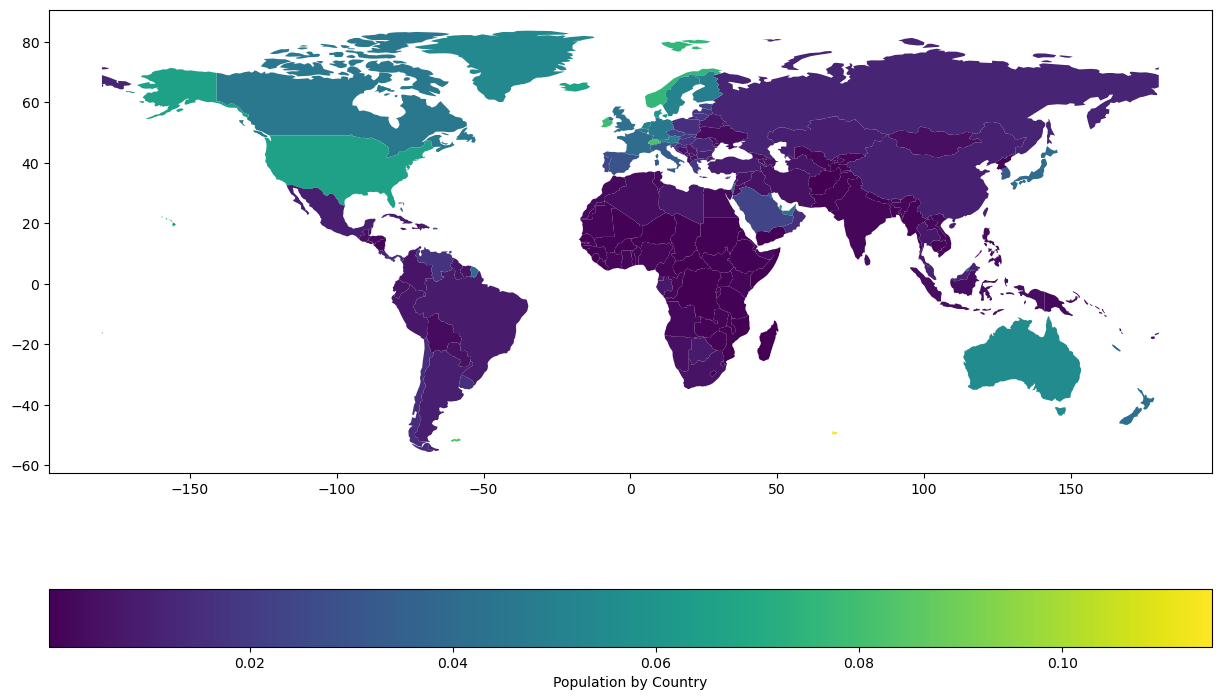

In [12]:
fig , ax = plt.subplots(1,1, figsize=(15, 10))

world.plot(column='gdp_per_cap',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

# 3.设置颜色：

### 可以使用 cmap 选项修改 plot() 使用的颜色（有关颜色图的完整列表，请参阅 matplotlib 网站）：

<AxesSubplot:>

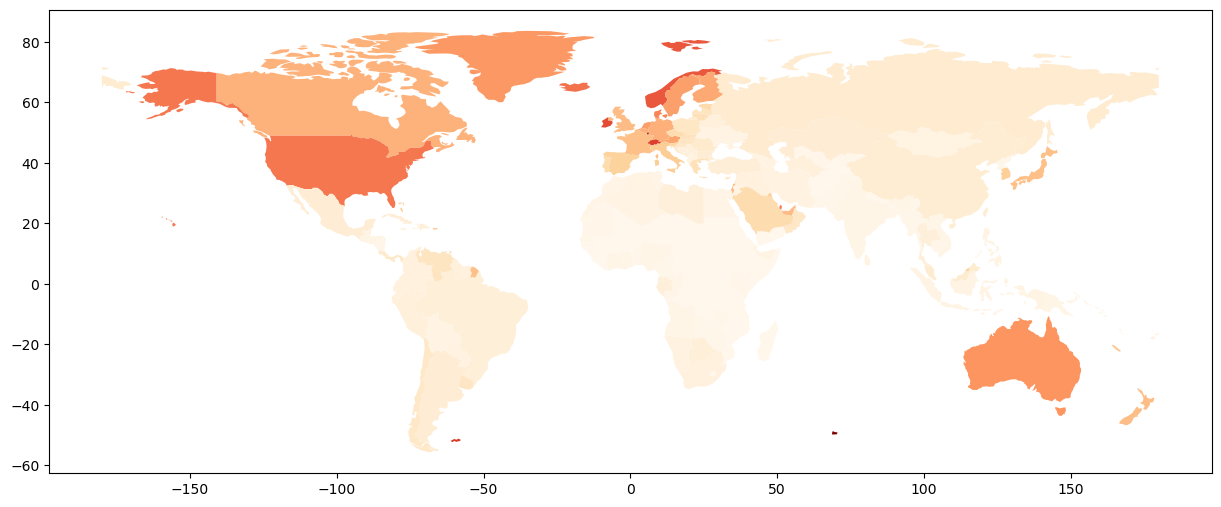

In [13]:
world.plot(column='gdp_per_cap' , cmap="OrRd", figsize=(15, 10))

### 当只想显示边界时，要使颜色透明，您有两种选择。

<AxesSubplot:>

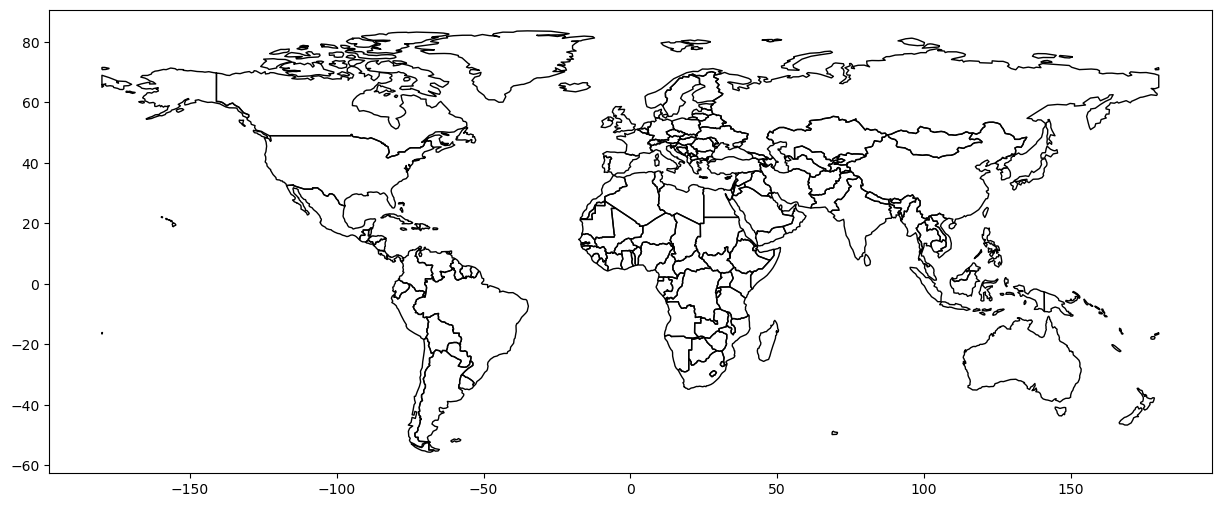

In [14]:
# facecolor="none", edgecolor="black"
world.plot(facecolor="none", edgecolor="black", figsize=(15, 10))

<AxesSubplot:>

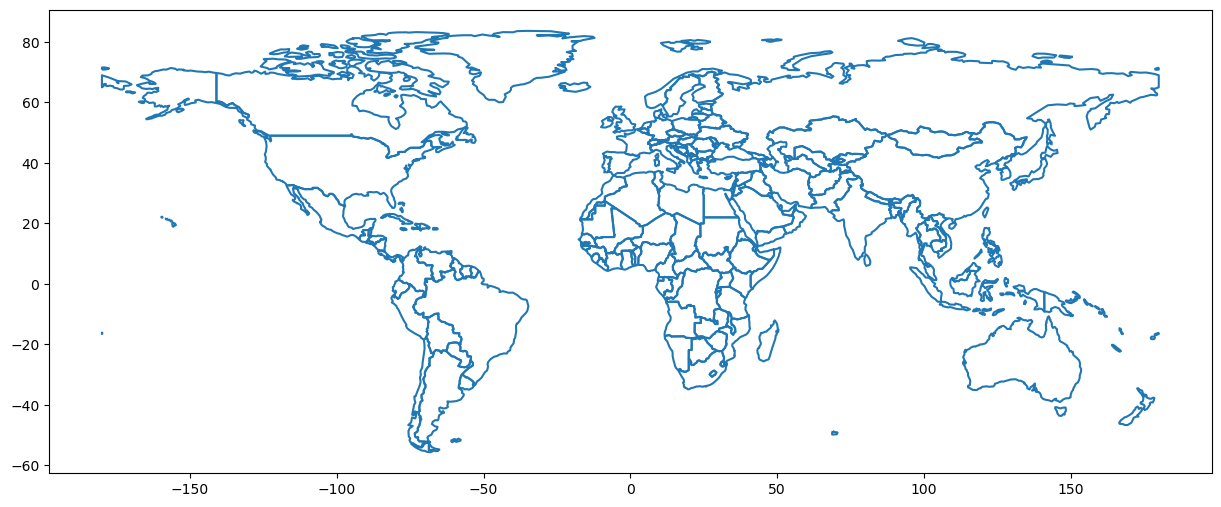

In [15]:
# 第二种选择是使用 world.boundary.plot()。这个选项更加明确和清晰。
world.boundary.plot(figsize=(15, 10))

### 颜色图的缩放方式可以使用 scheme 选项进行操作

<AxesSubplot:>

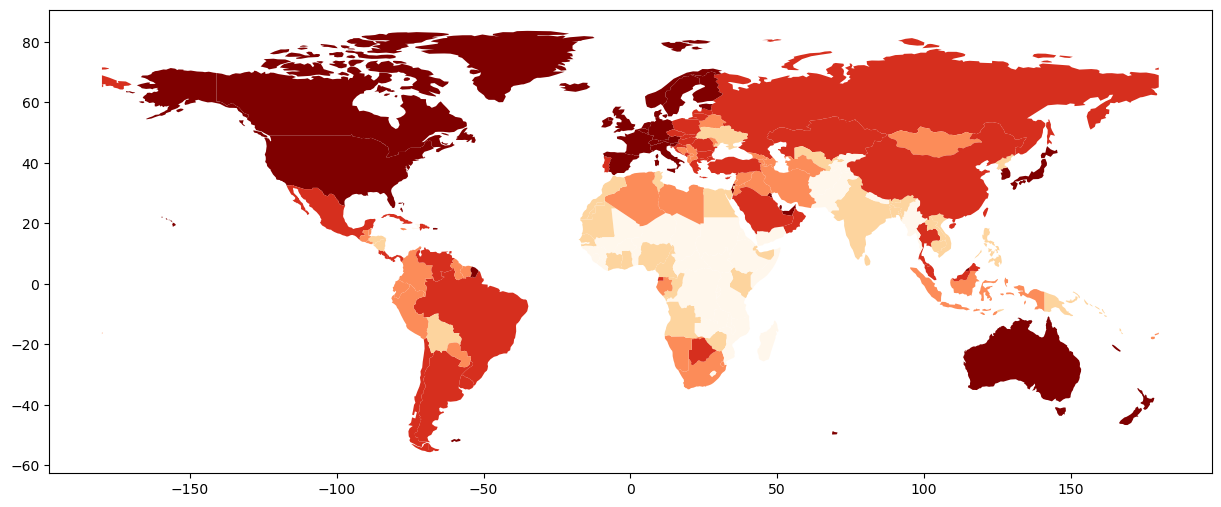

In [16]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme="quantiles", figsize=(15, 10))

# 4.缺失值处理：

In [17]:
import numpy as np

In [18]:
world.loc[np.random.choice(world.index, 40), 'gdp_per_cap'] = np.nan # 设置一些缺失值

In [19]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.006176
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.001089
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001504
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046195
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.065298
...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.007412
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.008908
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.004417
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


<AxesSubplot:>

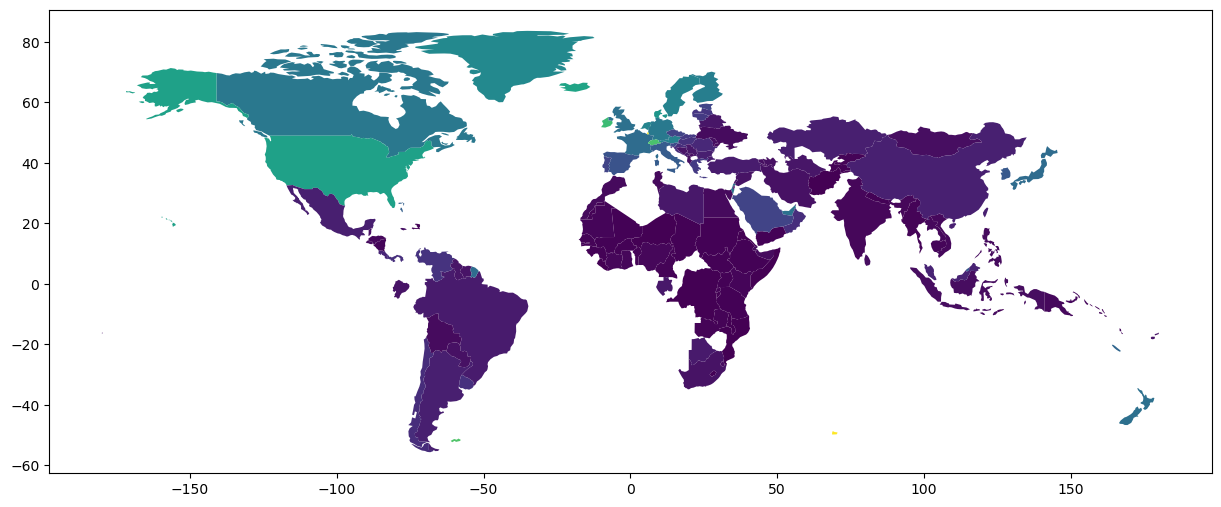

In [20]:
world.plot(column='gdp_per_cap' , figsize=(15, 10))

### 但是，传递 missing_kwds 可以指定包含 None 或 NaN 的特征的样式和标签。

<AxesSubplot:>

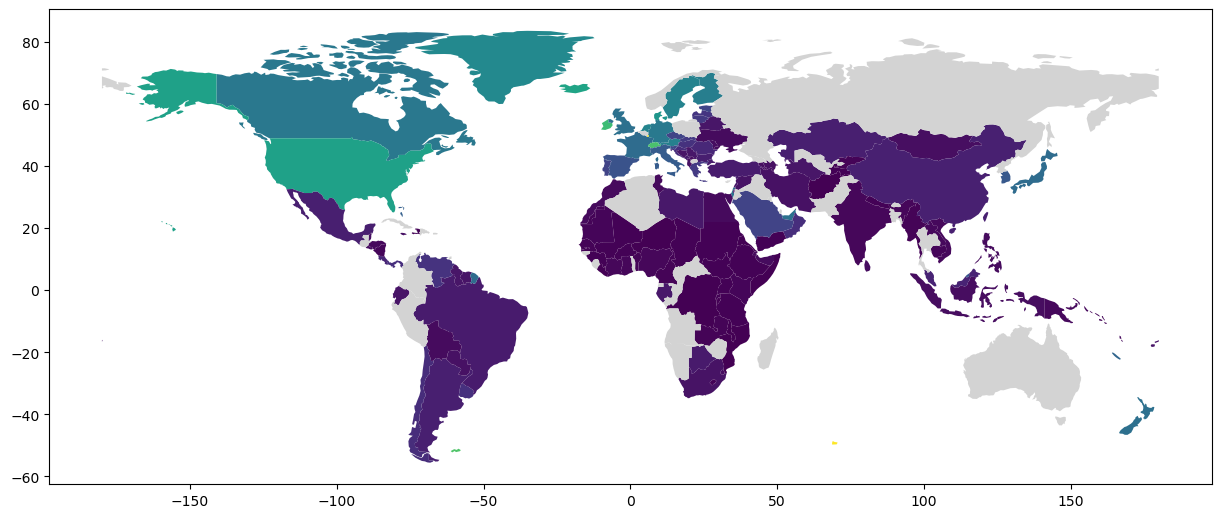

In [21]:
world.plot(column='gdp_per_cap' , missing_kwds={'color':'lightgrey'} , figsize=(15, 10))

<AxesSubplot:>

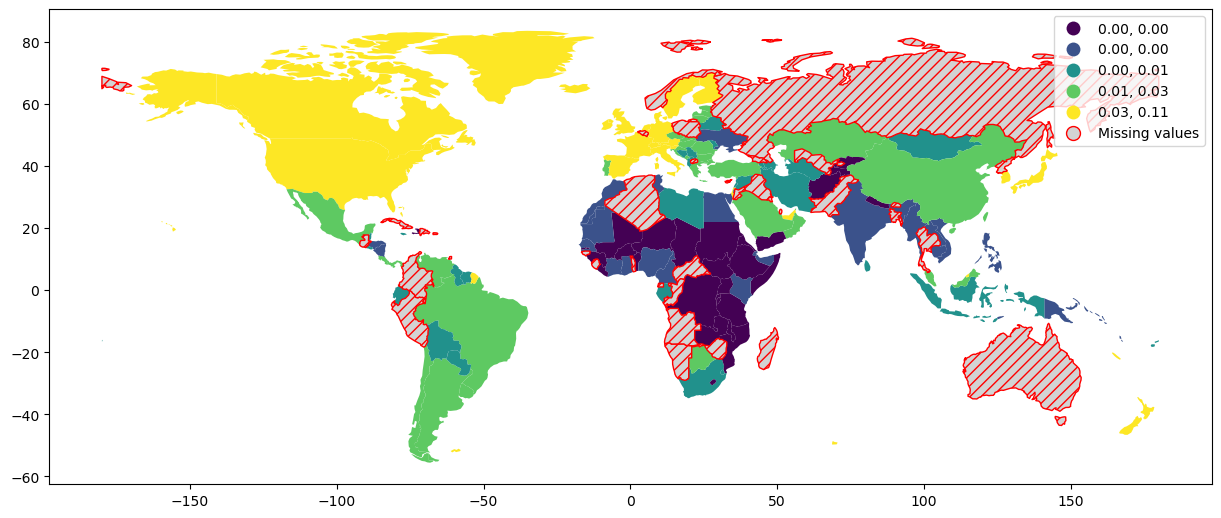

In [22]:
world.plot(
    column="gdp_per_cap",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
)

# 5.轴标签：

### 可以使用 set_axis_off() 或 axis(“off”) 轴方法关闭轴标签。

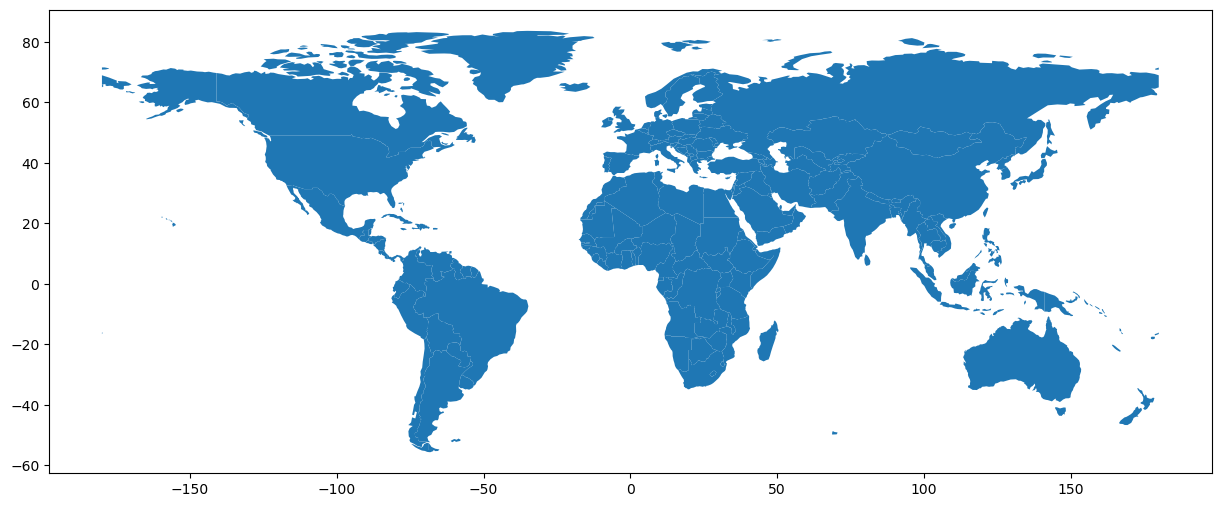

In [23]:
ax = world.plot(figsize=(15, 10))

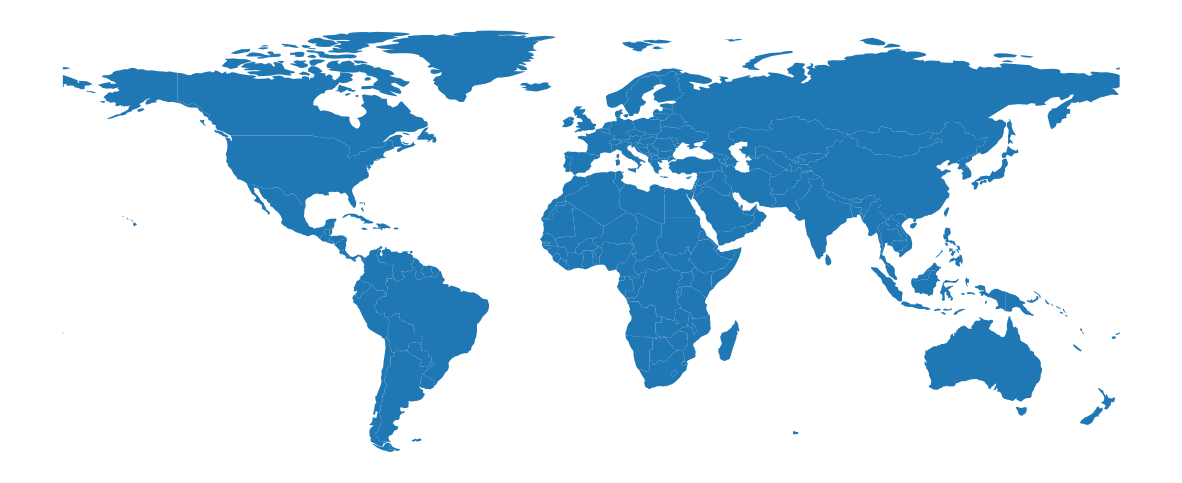

In [24]:
ax = world.plot(figsize=(15, 10))
ax.set_axis_off()